In [2]:
# Set project directory
import os
import sys


def project_dir():
    notebook_path = %pwd
    repo_name = "nsl_kdd"
    repo_folder = notebook_path.split(repo_name)[0]
    return os.path.join(repo_folder, repo_name)


pwd = os.getenv("PWD", project_dir())
os.environ["PWD"] = pwd
sys.path.append(pwd)

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from data_utils import *
from scipy.signal import stft
from PIL import Image

import warnings
warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)

In [5]:
(X_train, X_test, Y_train, Y_test), attack_classes = load_train_test_data(pwd=pwd, standardize=False, norm=True)

In [6]:
df = pd.DataFrame(data=X_train)

In [7]:
df

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,120,121
0,0.00000,0.955213,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.001945,0.0
1,0.00000,0.496369,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.003400,0.0
2,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.003516,0.0,0.0,0.0,0.000000,0.0
3,0.00000,0.028430,0.999100,0.0,0.0,0.0,0.0,0.0,0.000123,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000123,0.0
4,0.00000,0.337346,0.711986,0.0,0.0,0.0,0.0,0.0,0.001695,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.001695,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.003160,0.0,0.0,0.0,0.000000,0.0
125969,0.02021,0.265260,0.366311,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.002526,0.0
125970,0.00000,0.979230,0.168545,0.0,0.0,0.0,0.0,0.0,0.000439,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000439,0.0
125971,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.003412,0.0,0.0,0.0,0.000000,0.0


In [8]:
Y_train

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1]])

In [9]:
attack_classes

array(['DoS', 'Probe', 'R2L', 'U2R', 'normal'], dtype='<U6')

In [10]:
X_train.shape

(125973, 122)

In [11]:
Y_train.shape

(125973, 5)

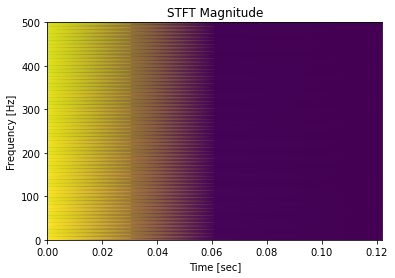

In [123]:
f, t, Zxx = stft(X_train[16],fs=1000, window='hann', nperseg=1000)

plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')

plt.title('STFT Magnitude')

plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')

plt.show()

In [122]:
Y_train[16]

array([0, 0, 0, 0, 1])

In [90]:
len(t)

3

In [58]:
len(f)/4

31.0

In [59]:
len(Zxx)/2

31.0